In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import csv

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1.14.0
0.22.0


In [2]:
#for this Analysis of IMDB genres and Bechdel ratings, I am taking the bechdel_titlebasics file.  The work for merging this file can be found in FileJoining.ipynb
genres_df = pd.read_csv('../Data/bechdel_titlebasics.csv', index_col = 0)
genres_df.head()

,bechdel_id,imdb_id,rating,title,release_yr,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,5433,tt0000003,0,Pauvre Pierrot,1892,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
1,6199,tt0000012,0,"Arrival of a Train, The",1896,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,"Documentary,Short"
2,5444,tt0000014,0,Tables Turned on the Gardener,1895,short,Tables Turned on the Gardener,L'arroseur arrosé,0,1895,\N,1,"Comedy,Short"
3,4982,tt0000091,0,"House of the Devil, The",1896,short,The House of the Devil,Le manoir du diable,0,1896,\N,3,"Horror,Short"
4,5406,tt0000131,0,Une nuit terrible,1896,short,A Terrible Night,Une nuit terrible,0,1896,\N,1,"Comedy,Horror,Short"


In [3]:
#check all the title types to see which ones we can filter away:
genres_df.groupby('titleType').sum()

,bechdel_id,rating,release_yr,isAdult
titleType,,,,
movie,28852344,15528,14324254,1
short,628287,58,223696,0
tvEpisode,207549,77,72072,0
tvMiniSeries,114686,77,59932,0
tvMovie,889237,456,362788,0
tvSeries,229362,103,80344,0
tvShort,3290,3,1987,0
tvSpecial,13683,2,3990,0
video,556029,302,256800,1


In [4]:
#our concern is in Movies and TV Movies, I am going to run an additional filter by titleType
genres_df = genres_df[(genres_df.titleType == 'movie') | (genres_df.titleType == 'tvMovie')]

In [5]:
#double check that the filter was performed correctly.  
genres_df.groupby('titleType').sum()

,bechdel_id,rating,release_yr,isAdult
titleType,,,,
movie,28852344,15528,14324254,1
tvMovie,889237,456,362788,0


In [6]:
#to categorize the movies by genres, i will need to split the genres by ','

def split_genres(genres):
    return genres.split(',')

genres_df['genresList'] = genres_df.genres.apply(split_genres)

In [7]:
genres_df.head(20)

,bechdel_id,imdb_id,rating,title,release_yr,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genresList
21,1349,tt0000574,1,"Story of the Kelly Gang, The",1906,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama","[Biography, Crime, Drama]"
23,2003,tt0002101,2,Cleopatra,1912,movie,Cleopatra,Cleopatra,0,1912,\N,100,"Drama,History","[Drama, History]"
27,4457,tt0003973,2,A Florida Enchantment,1914,movie,A Florida Enchantment,A Florida Enchantment,0,1914,\N,63,Comedy,[Comedy]
28,1258,tt0004972,2,"Birth of a Nation, The",1915,movie,The Birth of a Nation,The Birth of a Nation,0,1915,\N,195,"Drama,History,War","[Drama, History, War]"
29,2008,tt0006745,3,Gretchen the Greenhorn,1916,movie,Gretchen the Greenhorn,Gretchen the Greenhorn,0,1916,\N,58,"Crime,Drama,Romance","[Crime, Drama, Romance]"
30,5944,tt0006864,0,Intolerance: Love&#39;s Struggle Throughout th...,1916,movie,Intolerance: Love's Struggle Throughout the Ages,Intolerance: Love's Struggle Throughout the Ages,0,1916,\N,163,"Drama,History","[Drama, History]"
31,7004,tt0007361,3,Snow White,1916,movie,Snow White,Snow White,0,1916,\N,63,"Fantasy,Romance","[Fantasy, Romance]"
33,1994,tt0008443,3,"Poor Little Rich Girl, The",1917,movie,The Poor Little Rich Girl,The Poor Little Rich Girl,0,1917,\N,65,"Comedy,Drama,Family","[Comedy, Drama, Family]"
34,2019,tt0008489,2,"Raffles, the Amateur Cracksman",1917,movie,"Raffles, the Amateur Cracksman","Raffles, the Amateur Cracksman",0,1917,\N,70,"Adventure,Crime,Romance","[Adventure, Crime, Romance]"
35,1993,tt0008499,3,Rebecca of Sunnybrook Farm,1917,movie,Rebecca of Sunnybrook Farm,Rebecca of Sunnybrook Farm,0,1917,\N,78,"Comedy,Drama","[Comedy, Drama]"


In [8]:
#now that we have the genres in a list, I need to find the unique set of genres 
genres_set = set(genres_df['genres'].str.cat(sep=',').split(','))
print(genres_set)

{'Biography', 'History', 'Horror', 'Documentary', 'Western', 'Romance', 'Crime', '\\N', 'Adult', 'War', 'Drama', 'Fantasy', 'Mystery', 'Family', 'Film-Noir', 'Animation', 'Music', 'Musical', 'Game-Show', 'Sci-Fi', 'Sport', 'Action', 'News', 'Thriller', 'Comedy', 'Adventure'}


In [9]:
#Before making more adjustments to the data, I am going to run some additional checks.  First - all movies have a release year:
genres_df.groupby('release_yr').sum()

,bechdel_id,rating,isAdult
release_yr,,,
1906,1349,1,0
1912,2003,2,0
1914,4457,2,0
1915,1258,2,0
1916,16970,9,0
1917,10002,11,0
1918,11111,9,0
1919,4606,3,0
1920,9245,6,0


In [10]:
#Second check - how many movies do not have genres:
#the genres set I created lets me know that movies with no genres have the value '\N' in the genres column:
genres_df[genres_df.genres == '\\N'].shape

(7, 14)

In [11]:
#Even though there are only 7 movies with no genre, I am going to keep this data.  When I do the analysis, these films will be counted towards the "Non-Specified" Category.  

#For the rest of the analysis, I will be working only with the rating column, which is the bechdel rating of every film, and the genresList column.  I will be creating new columns for the analysis.  
#dropping columns:
genres_df.head(20)

,bechdel_id,imdb_id,rating,title,release_yr,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genresList
21,1349,tt0000574,1,"Story of the Kelly Gang, The",1906,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama","[Biography, Crime, Drama]"
23,2003,tt0002101,2,Cleopatra,1912,movie,Cleopatra,Cleopatra,0,1912,\N,100,"Drama,History","[Drama, History]"
27,4457,tt0003973,2,A Florida Enchantment,1914,movie,A Florida Enchantment,A Florida Enchantment,0,1914,\N,63,Comedy,[Comedy]
28,1258,tt0004972,2,"Birth of a Nation, The",1915,movie,The Birth of a Nation,The Birth of a Nation,0,1915,\N,195,"Drama,History,War","[Drama, History, War]"
29,2008,tt0006745,3,Gretchen the Greenhorn,1916,movie,Gretchen the Greenhorn,Gretchen the Greenhorn,0,1916,\N,58,"Crime,Drama,Romance","[Crime, Drama, Romance]"
30,5944,tt0006864,0,Intolerance: Love&#39;s Struggle Throughout th...,1916,movie,Intolerance: Love's Struggle Throughout the Ages,Intolerance: Love's Struggle Throughout the Ages,0,1916,\N,163,"Drama,History","[Drama, History]"
31,7004,tt0007361,3,Snow White,1916,movie,Snow White,Snow White,0,1916,\N,63,"Fantasy,Romance","[Fantasy, Romance]"
33,1994,tt0008443,3,"Poor Little Rich Girl, The",1917,movie,The Poor Little Rich Girl,The Poor Little Rich Girl,0,1917,\N,65,"Comedy,Drama,Family","[Comedy, Drama, Family]"
34,2019,tt0008489,2,"Raffles, the Amateur Cracksman",1917,movie,"Raffles, the Amateur Cracksman","Raffles, the Amateur Cracksman",0,1917,\N,70,"Adventure,Crime,Romance","[Adventure, Crime, Romance]"
35,1993,tt0008499,3,Rebecca of Sunnybrook Farm,1917,movie,Rebecca of Sunnybrook Farm,Rebecca of Sunnybrook Farm,0,1917,\N,78,"Comedy,Drama","[Comedy, Drama]"


In [12]:
genres_df.drop('bechdel_id', axis = 1, inplace = True)
genres_df.drop('imdb_id', axis = 1, inplace = True)
genres_df.drop('title', axis = 1, inplace = True)
genres_df.drop('release_yr', axis = 1, inplace = True)
genres_df.drop('titleType', axis = 1, inplace = True)
genres_df.drop('primaryTitle', axis = 1, inplace = True)
genres_df.drop('originalTitle', axis = 1, inplace = True)
genres_df.drop('startYear', axis = 1, inplace = True)
genres_df.drop('endYear', axis = 1, inplace = True)
genres_df.drop('runtimeMinutes', axis = 1, inplace = True)
genres_df.head(20)

#keeping isAdult column for now, because I will want to filter Adult movies out before the final plotting.  

,rating,isAdult,genres,genresList
21,1,0,"Biography,Crime,Drama","[Biography, Crime, Drama]"
23,2,0,"Drama,History","[Drama, History]"
27,2,0,Comedy,[Comedy]
28,2,0,"Drama,History,War","[Drama, History, War]"
29,3,0,"Crime,Drama,Romance","[Crime, Drama, Romance]"
30,0,0,"Drama,History","[Drama, History]"
31,3,0,"Fantasy,Romance","[Fantasy, Romance]"
33,3,0,"Comedy,Drama,Family","[Comedy, Drama, Family]"
34,2,0,"Adventure,Crime,Romance","[Adventure, Crime, Romance]"
35,3,0,"Comedy,Drama","[Comedy, Drama]"


In [13]:
#creating a new column for every genre in genres_set:

def contains_genre(genre, genresList):
    if genre in genresList:
        return 1
    else:
        return 0
    
#this means that movies with multiple genres will be counted multiple times, but without a weight given to genres, there is really no other way to count the movies per genre.
    
#testing for 1 column:
genres_df['Drama'] = np.vectorize(contains_genre)('Drama', genres_df['genresList'])

In [14]:
genres_df.head(20)

,rating,isAdult,genres,genresList,Drama
21,1,0,"Biography,Crime,Drama","[Biography, Crime, Drama]",1
23,2,0,"Drama,History","[Drama, History]",1
27,2,0,Comedy,[Comedy],0
28,2,0,"Drama,History,War","[Drama, History, War]",1
29,3,0,"Crime,Drama,Romance","[Crime, Drama, Romance]",1
30,0,0,"Drama,History","[Drama, History]",1
31,3,0,"Fantasy,Romance","[Fantasy, Romance]",0
33,3,0,"Comedy,Drama,Family","[Comedy, Drama, Family]",1
34,2,0,"Adventure,Crime,Romance","[Adventure, Crime, Romance]",0
35,3,0,"Comedy,Drama","[Comedy, Drama]",1


In [15]:
#given successful testing, I am going to remove test column, then create a column for every genre in genres_set
genres_df.drop('Drama', axis = 1, inplace = True)
genres_df.head(20)

,rating,isAdult,genres,genresList
21,1,0,"Biography,Crime,Drama","[Biography, Crime, Drama]"
23,2,0,"Drama,History","[Drama, History]"
27,2,0,Comedy,[Comedy]
28,2,0,"Drama,History,War","[Drama, History, War]"
29,3,0,"Crime,Drama,Romance","[Crime, Drama, Romance]"
30,0,0,"Drama,History","[Drama, History]"
31,3,0,"Fantasy,Romance","[Fantasy, Romance]"
33,3,0,"Comedy,Drama,Family","[Comedy, Drama, Family]"
34,2,0,"Adventure,Crime,Romance","[Adventure, Crime, Romance]"
35,3,0,"Comedy,Drama","[Comedy, Drama]"


In [16]:
for genre in genres_set:
    if genre != '\\N':
        genres_df[genre] = np.vectorize(contains_genre)(genre, genres_df['genresList'])
    else:
        genres_df['Non-Specified'] = np.vectorize(contains_genre)(genre, genres_df['genresList'])

In [17]:
genres_df.head(20)

,rating,isAdult,genres,genresList,Biography,History,Horror,Documentary,Western,Romance,...,Music,Musical,Game-Show,Sci-Fi,Sport,Action,News,Thriller,Comedy,Adventure
21,1,0,"Biography,Crime,Drama","[Biography, Crime, Drama]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,2,0,"Drama,History","[Drama, History]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,2,0,Comedy,[Comedy],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28,2,0,"Drama,History,War","[Drama, History, War]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,3,0,"Crime,Drama,Romance","[Crime, Drama, Romance]",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30,0,0,"Drama,History","[Drama, History]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,3,0,"Fantasy,Romance","[Fantasy, Romance]",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
33,3,0,"Comedy,Drama,Family","[Comedy, Drama, Family]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2,0,"Adventure,Crime,Romance","[Adventure, Crime, Romance]",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
35,3,0,"Comedy,Drama","[Comedy, Drama]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
#to make this more appropriate, I will be filtering out the Adult = 1 or isAdult = 1 rows:

genres_df = genres_df[(genres_df.Adult==0) & (genres_df.isAdult==0)]

In [19]:
# drop the Adult and isAdult columns from the data:
genres_df.drop('Adult', axis = 1, inplace = True)
genres_df.drop('isAdult', axis = 1, inplace = True)

In [20]:
#group by the bechdel ratings, then transpose to see all summed data:
genres_table = genres_df.groupby('rating').sum().T

In [21]:
genres_table.head(40)

rating,0,1,2,3
Biography,27,107,53,228
History,29,60,32,115
Horror,74,148,73,592
Documentary,17,17,2,48
Western,17,23,11,16
Romance,66,178,195,962
Crime,114,352,110,462
Non-Specified,1,1,0,5
War,47,32,15,57
Drama,349,857,431,2500


In [22]:
#reset column names so it is easier to call:
genres_table.columns = ['0','1', '2', '3']
genres_table.rename_axis('Genres').rename_axis('Ratings', axis='columns')

Ratings,0,1,2,3
Genres,,,,
Biography,27,107,53,228
History,29,60,32,115
Horror,74,148,73,592
Documentary,17,17,2,48
Western,17,23,11,16
Romance,66,178,195,962
Crime,114,352,110,462
Non-Specified,1,1,0,5
War,47,32,15,57


In [23]:
genres_table = genres_table.sort_values('3', ascending = True)
genres_table.head(40)

,0,1,2,3
Game-Show,0,0,0,1
News,0,1,0,3
Non-Specified,1,1,0,5
Western,17,23,11,16
Film-Noir,6,20,14,19
Sport,9,31,14,39
Documentary,17,17,2,48
War,47,32,15,57
History,29,60,32,115
Musical,5,36,23,122


In [24]:
#create a second table for just pass and fail counts.  Pass is a 3, fail is everything else
genres_pass_fail = genres_df.groupby('rating').sum().T
genres_pass_fail.columns = ['0','1', '2', '3']
genres_pass_fail.rename_axis('Genres').rename_axis('Ratings', axis='columns')

Ratings,0,1,2,3
Genres,,,,
Biography,27,107,53,228
History,29,60,32,115
Horror,74,148,73,592
Documentary,17,17,2,48
Western,17,23,11,16
Romance,66,178,195,962
Crime,114,352,110,462
Non-Specified,1,1,0,5
War,47,32,15,57


In [25]:
genres_pass_fail['Passing Count'] = genres_pass_fail['3']
genres_pass_fail['Failing Count'] = genres_pass_fail['0']+genres_pass_fail['1']+genres_pass_fail['2']
genres_pass_fail.drop('0', axis = 1, inplace = True)
genres_pass_fail.drop('1', axis = 1, inplace = True)
genres_pass_fail.drop('2', axis = 1, inplace = True)
genres_pass_fail.drop('3', axis = 1, inplace = True)

In [26]:
genres_pass_fail = genres_pass_fail.sort_values('Passing Count', ascending = True)
genres_pass_fail.head(40)

,Passing Count,Failing Count
Game-Show,1,0
News,3,1
Non-Specified,5,2
Western,16,51
Film-Noir,19,40
Sport,39,54
Documentary,48,36
War,57,94
History,115,121
Musical,122,64


In [44]:
#create a third table for percent stacked bars.  
genres_table_perc = genres_df.groupby('rating').sum().T
genres_table_perc.columns = ['0','1', '2', '3']
genres_table_perc.rename_axis('Genres').rename_axis('Ratings', axis='columns')

genres_table_perc['Total_Count'] = genres_table_perc['0']+genres_table_perc['1']+genres_table_perc['2']+genres_table_perc['3']

genres_table_perc['0p'] = genres_table_perc['0']/genres_table_perc['Total_Count']*100
genres_table_perc['1p'] = genres_table_perc['1']/genres_table_perc['Total_Count']*100
genres_table_perc['2p'] = genres_table_perc['2']/genres_table_perc['Total_Count']*100
genres_table_perc['3p'] = genres_table_perc['3']/genres_table_perc['Total_Count']*100

genres_table_perc.drop(['0', '1', '2', '3', 'Total_Count'], axis = 1, inplace = True)
genres_table_perc.columns = ['0', '1', '2', '3']
genres_table_perc = genres_table_perc.sort_values('3', ascending = True)


#dropping non-specified, news, gameshow due to too little data:
genres_table_perc.drop(['Non-Specified', 'News', 'Game-Show'], axis = 0, inplace = True)

genres_table_perc.head(30)


,0,1,2,3
Western,25.373134,34.328358,16.417910,23.880597
Film-Noir,10.169492,33.898305,23.728814,32.203390
War,31.125828,21.192053,9.933775,37.748344
Action,14.655870,32.469636,11.012146,41.862348
Sport,9.677419,33.333333,15.053763,41.935484
Crime,10.982659,33.911368,10.597303,44.508671
Adventure,13.822526,30.119454,9.385666,46.672355
History,12.288136,25.423729,13.559322,48.728814
Sci-Fi,12.943262,28.368794,9.574468,49.113475
Thriller,12.438786,26.640548,7.639569,53.281097


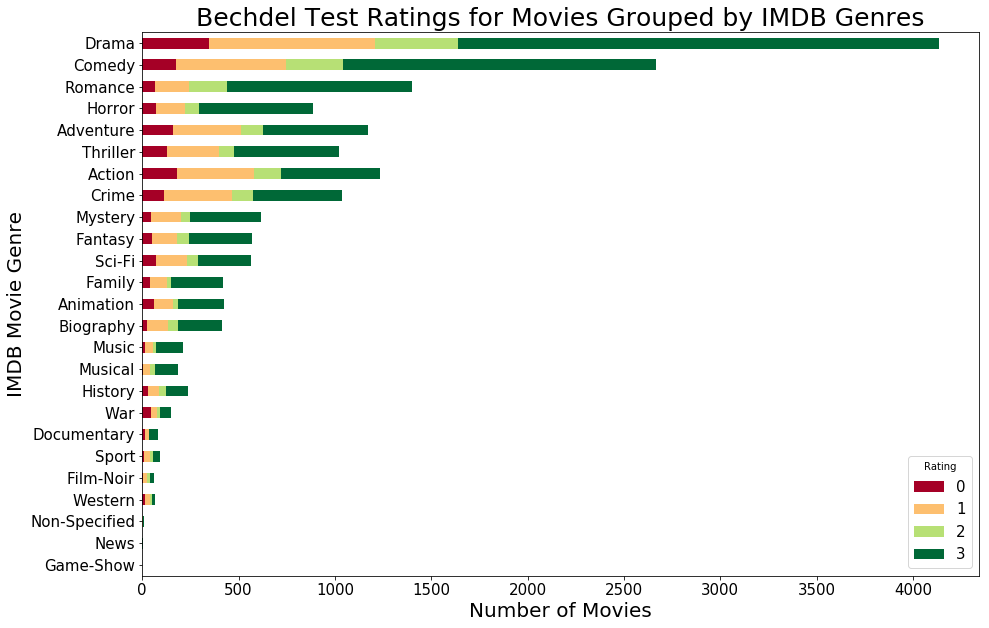

In [37]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

chart_bechdel_genres = genres_table.plot(kind='barh', stacked=True, colormap='RdYlGn', figsize = (15,10))
chart_bechdel_genres.set_xlabel('Number of Movies', size=20)
chart_bechdel_genres.set_ylabel('IMDB Movie Genre', size=20)
chart_bechdel_genres.set_title('Bechdel Test Ratings for Movies Grouped by IMDB Genres', size=25)
plt.legend(loc=4, prop={'size': 15}, title='Rating')

chart_bechdel_genres

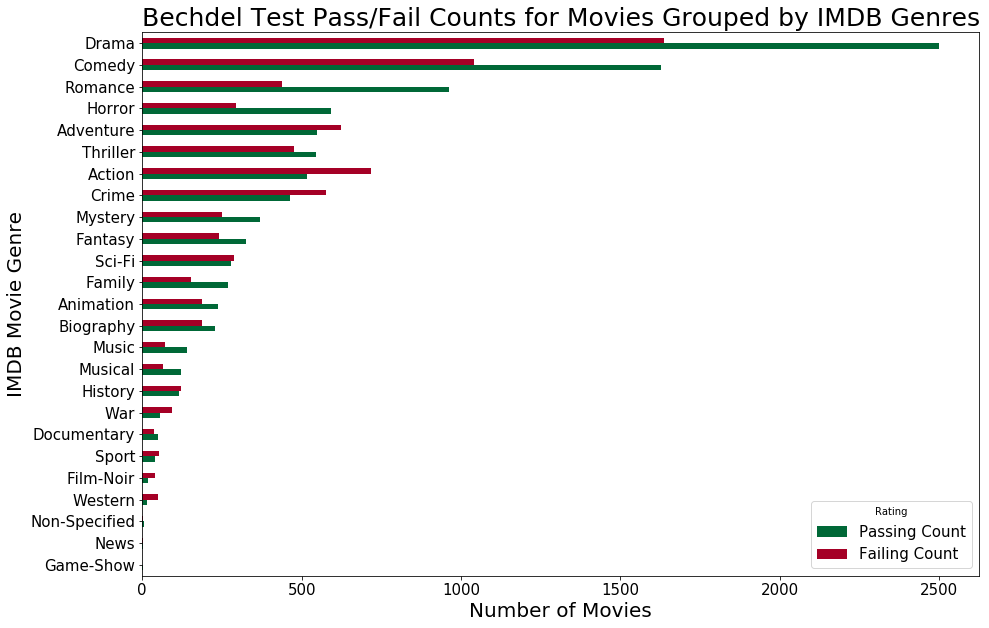

In [29]:
chart_bechdelPF_genres = genres_pass_fail.plot(kind='barh', colormap='RdYlGn_r', figsize = (15,10))
chart_bechdelPF_genres.set_xlabel('Number of Movies', size=20)
chart_bechdelPF_genres.set_ylabel('IMDB Movie Genre', size=20)
chart_bechdelPF_genres.set_title('Bechdel Test Pass/Fail Counts for Movies Grouped by IMDB Genres', size=25)
plt.legend(loc=4, prop={'size': 15}, title='Rating')

chart_bechdelPF_genres

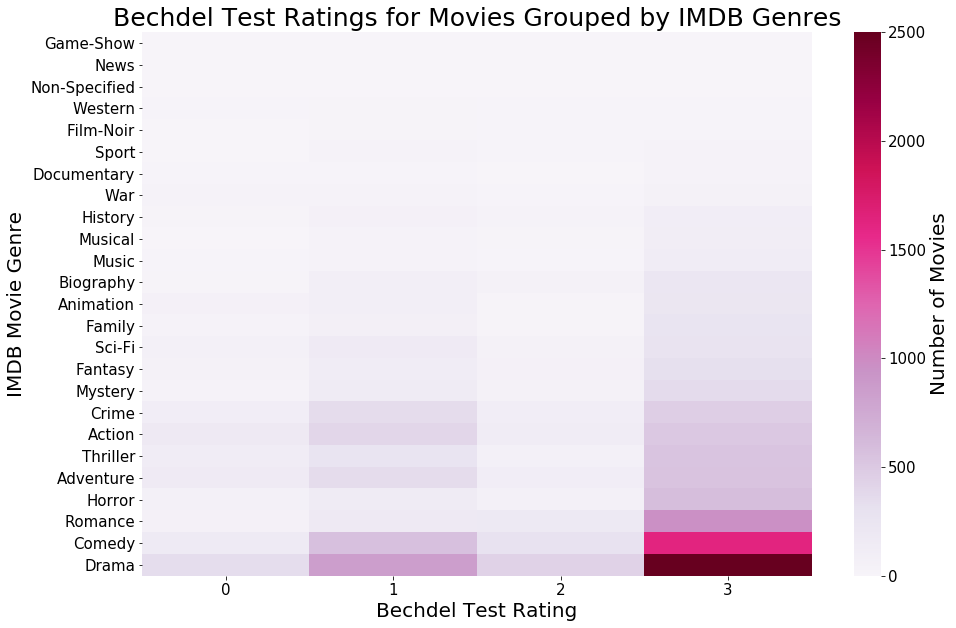

In [30]:
import seaborn as sns
plt.figure(figsize=(15,10))
bechdel_genres_heat = sns.heatmap(genres_table, cmap = 'PuRd', cbar_kws={'label': 'Number of Movies'})
bechdel_genres_heat.set_xlabel('Bechdel Test Rating', size=20)
bechdel_genres_heat.set_ylabel('IMDB Movie Genre', size=20)
bechdel_genres_heat.set_title('Bechdel Test Ratings for Movies Grouped by IMDB Genres', size=25)
bechdel_genres_heat.figure.axes[-1].yaxis.label.set_size(20)

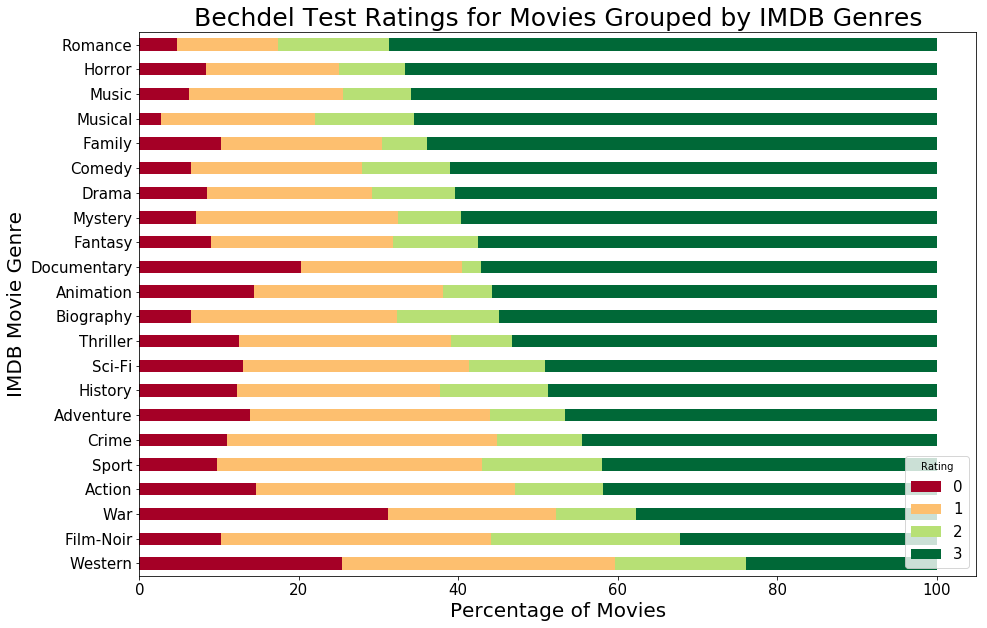

In [41]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

chart_bechdel_genres_perc = genres_table_perc.plot(kind='barh', stacked=True, colormap='RdYlGn', figsize = (15,10))
chart_bechdel_genres_perc.set_xlabel('Percentage of Movies', size=20)
chart_bechdel_genres_perc.set_ylabel('IMDB Movie Genre', size=20)
chart_bechdel_genres_perc.set_title('Bechdel Test Ratings for Movies Grouped by IMDB Genres', size=25)
plt.legend(loc=4, prop={'size': 15}, title='Rating')

chart_bechdel_genres_perc

In [43]:
fig1 = chart_bechdel_genres.get_figure()
fig1.savefig('bechdel_ratings_over_genres.png', bbox_inches='tight')

fig2 = chart_bechdelPF_genres.get_figure()
fig2.savefig('bechdel_pass_fail_over_genres.png', bbox_inches='tight')

fig3 = bechdel_genres_heat.get_figure()
fig3.savefig('bechdel_genres_heatmap.png', bbox_inches='tight')

fig4 = chart_bechdel_genres_perc.get_figure()
fig4.savefig('PERCENT_bechdel_ratings_over_genres.png', bbox_inches='tight')